# Tarea4: Derivación automática 2

Fecha de envío del PR inicial: **viernes 7 de abril**

Fecha de aceptación del PR: **martes 18 de abril, antes de la clase**

---

## Ejercicio 1

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.io/en/stable/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea4.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Pueden aprovechar las capacidades de Julia en metaprogramming.

Para usar un dual como argumento de una función utilizamos la regla de la cadena:
$\frac {d} {dx} \; g(f(x)) = g'(f(x))\cdot f'(x)$

In [2]:
#Llamamos a las operaciones definidas para los duales de la tarea anterior.
include("AutomDiff.jl")
using AD
#Importamos las funciones de Julia
import Base:/,sqrt,cbrt,
            exp,log,
            sin,cos,tan,
            cot,sec,csc,
            sinh,cosh,tanh,
            coth,sech,csch,
            asin,acos,atan,
            acot,asec,acsc,
            asinh,acosh,atanh,
            acoth,asech,acsch
            

/(a::Real, b::Dual) = Dual(a / b.fun, -a * b.der / b.fun^2)

sqrt(a::Dual) = Dual(sqrt(a.fun), a.der/(2*sqrt(a.fun)))
cbrt(a::Dual) = Dual(cbrt(a.fun), 1/(3*(a.fun^(2/3))))

exp(a::Dual) = Dual(exp(a.fun), exp(a.fun) * a.der)
log(a::Dual) = Dual(log(a.fun), (1/(a.fun)) *a.der)

sin(a::Dual) = Dual(sin(a.fun), cos(a.fun) * a.der)
cos(a::Dual) = Dual(cos(a.fun), - sin(a.fun) * a.der)
tan(a::Dual) = Dual(tan(a.fun), (1/(cos(a.fun))^2) * a.der)

cot(a::Dual) = Dual(cot(a.fun), - 1/(sin(a.fun))^2 * a.der)
sec(a::Dual) = Dual(sec(a.fun), sec(a.fun)*tan(a.fun) * a.der)
csc(a::Dual) = Dual(csc(a.fun), - csc(a.fun)*cot(a.fun) * a.der)

sinh(a::Dual) = Dual(sinh(a.fun), cosh(a.fun) * a.der)
cosh(a::Dual) = Dual(cosh(a.fun), sinh(a.fun) * a.der)
tanh(a::Dual) = Dual(tanh(a.fun), (1/(cosh(a.fun))^2) * a.der)

coth(a::Dual) = Dual(coth(a.fun), - (1/sinh(a.fun)^2) * a.der)
sech(a::Dual) = Dual(sech(a.fun), - sech(a.fun)*tanh(a.fun) * a.der)
csch(a::Dual) = Dual(csch(a.fun), - csch(a.fun)*coth(a.fun) * a.der)

asin(a::Dual) = Dual(asin(a.fun), (1/sqrt(1-a.fun^2)) * a.der)
acos(a::Dual) = Dual(acos(a.fun), - (1/sqrt(1-a.fun^2)) * a.der)
atan(a::Dual) = Dual(atan(a.fun), (1/1+(a.fun)^2) * a.der)
    
acot(a::Dual) = Dual(acot(a.fun), - (1/1+(a.fun)^2) * a.der)
asec(a::Dual) = Dual(asec(a.fun), (1/a.fun*sqrt(((a.fun)^2)-1)) * a.der)
acsc(a::Dual) = Dual(acsc(a.fun), - (1/a.fun*sqrt(((a.fun)^2)-1)) * a.der)
    
asinh(a::Dual) = Dual(asinh(a.fun), (1/sqrt(((a.fun)^2)+1)) * a.der)
acosh(a::Dual) = Dual(acosh(a.fun), (1/sqrt(((a.fun)^2)-1)) * a.der)
atanh(a::Dual) = Dual(atanh(a.fun), (1/(1-(a.fun)^2)) * a.der)

acoth(a::Dual) = Dual(acoth(a.fun), - (1/((a.fun^2)-1)) * a.der)
asech(a::Dual) = Dual(asech(a.fun), - (1/(abs(a.fun)*sqrt(1-(a.fun)^2))) * a.der)
acsch(a::Dual) = Dual(acsch(a.fun), - (1/(abs(a.fun)*sqrt(1+(a.fun)^2))) * a.der)        
       

acsch (generic function with 5 methods)

In [3]:
using Base.Test

@testset "prueba de funciones" begin

    @test sqrt(xdual(2)) == Dual(1.4142135623730951,0.35355339059327373)
    @test cbrt(xdual(27)) == Dual(3.0,0.03703703703703705)
    
    @test exp(xdual(1))==Dual(2.718281828459045,2.718281828459045)
    @test log(xdual(1))==Dual(0.0,1.0)
    
    @test sin(xdual(0))==Dual(0,1)
    @test cos(xdual(0))==Dual(1.0,0.0)
    @test tan(xdual(0))==Dual(0.0,1.0)
    
    @test cot(xdual(90))==Dual(-0.5012027833801532,-1.2512042300680128)
    @test sec(xdual(0))==Dual(1.0,0.0)
    @test csc(xdual(90))==Dual(1.1185724071637084,0.5606316038826887)
    
    @test sinh(xdual(0))==Dual(0.0,1.0)
    @test cosh(xdual(0))==Dual(1.0,0.0)
    @test tanh(xdual(0))==Dual(0.0,1.0)
    
    @test coth(xdual(90))==Dual(1.0,-2.685673715284637e-78)
    @test sech(xdual(0))==Dual(1.0,0.0)
    @test csch(xdual(90))==Dual(1.638802524798103e-39,-1.638802524798103e-39)
    
    @test asin(xdual(0))==Dual(0.0,1.0)
    @test acos(xdual(0))==Dual(1.5707963267948966,-1.0)
    @test atan(xdual(0))==Dual(0.0,1.0)
    
    @test acot(xdual(1))==Dual(0.7853981633974483,-2.0)
    @test asec(xdual(1))==Dual(0.0,0.0)
    @test acsc(xdual(90))==Dual(0.011111339747498774,-0.9999382696996233) 
    
    @test asinh(xdual(0))==Dual(0.0,1.0)
    @test acosh(xdual(90))==Dual(5.192925985263684,0.011111797045680466)
    @test atanh(xdual(0))==Dual(0.0,1.0)
    
    @test acoth(xdual(90))==Dual(0.0111115683923551,-0.00012347203358439315)
    @test asech(xdual(1))==Dual(0.0,-Inf)
    @test acsch(xdual(90))==Dual(0.01111088250012608,-0.00012344917003949906)     
    
    
end 

Test Summary:       | Pass  Total
  prueba de funciones |   28     28


Base.Test.DefaultTestSet("prueba de funciones",Any[],28,false)

---

## Ejercicio 2

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [4]:
x0 = xdual(2)

AD.Dual{Int64}(2,1)

In [5]:
function f(x)
    return sin(x^3-(2/x^6))
end

f (generic function with 1 method)

In [6]:
dualf=f(x0)

AD.Dual{Float64}(0.9934213368955197,-1.384934905523464)

In [7]:
dualf.fun

0.9934213368955197

In [8]:
dualf.der

-1.384934905523464

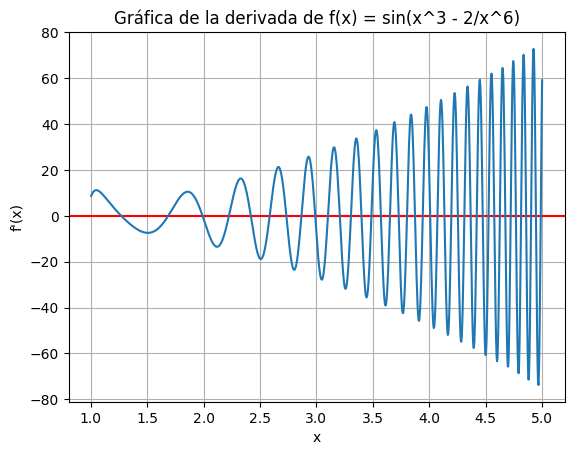

In [9]:
using PyPlot

#Referencia: https://github.com/carlosr47/2017-2_TSFisComputacional-1/blob/3b5382dfa37afebea8ad58d0d58b3648508b672f/tareas/Carlos/Tarea4.ipynb

n=1000
part=(5-1)/n #particiones

x=[i=zero(eltype(part)) for i=1:n]
y=[i=zero(eltype(part)) for i=1:n] 

for i in 1:n
    x0=1+i*part
    dualf=f(xdual(x0))
    x[i]=x0
    y[i]=dualf.der 
end

title("Gráfica de la derivada de f(x) = sin(x^3 - 2/x^6)")#Título de la gráfica
xlabel("x") #Etiqueta para el eje X
ylabel("f'(x)")#Etiqueta para el eje Y

axhline(0, color="red") 
plot(x,y)

grid()
show()

---

## Ejercicio 3

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [10]:
doc"""
newton1D(f,x0)

Por medio del método de Newton esta función calcula la raiz de 
una función \$ f \$, entorno al valor inicial \$x_0\$. 

"""

function newton1D(f,x0) 
    
    #i=0 #contador de número de pasos
    e = 1e-16 #Tolerancia del error
    delta = 1.0 #Valor inicial de delta
    x1=0
    while(delta>e) 

        dualf=f(xdual(x0))
        x1 = x0 - (dualf.fun/dualf.der)
        delta=abs(x1-x0) #Distancia entre la aproximación y el valor inicial
        x0 = x1 #Actualizamos el valor inicial
        #i+=1
    end
    
    return x1
    
end                

newton1D

In [11]:
?newton1D

search:



newton1D(f,x0)

Por medio del método de Newton esta función calcula la raiz de  una función $ f $, entorno al valor inicial $x_0$. 


In [12]:
function w6(x)
    return (x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)    
end    

w6 (generic function with 1 method)

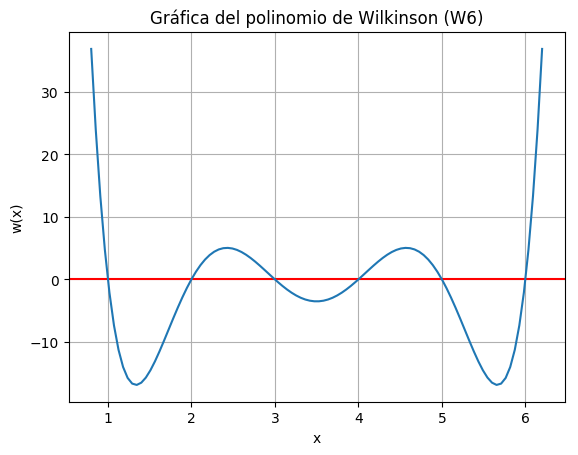

In [13]:
x = linspace(0.8, 6.2, 100)
y = w6.(x)

title("Gráfica del polinomio de Wilkinson (W6)")#Título de la gráfica
xlabel("x") #Etiqueta para el eje X
ylabel("w(x)")#Etiqueta para el eje Y

axhline(0, color="red") 
grid()

plot(x,y)
show()

In [14]:
newton1D(w6,2.2)

2.0

In [15]:
newton1D(w6,2.45)

6.0

In [16]:
function g(x)
    return x*sin(2*x)
end

g (generic function with 1 method)

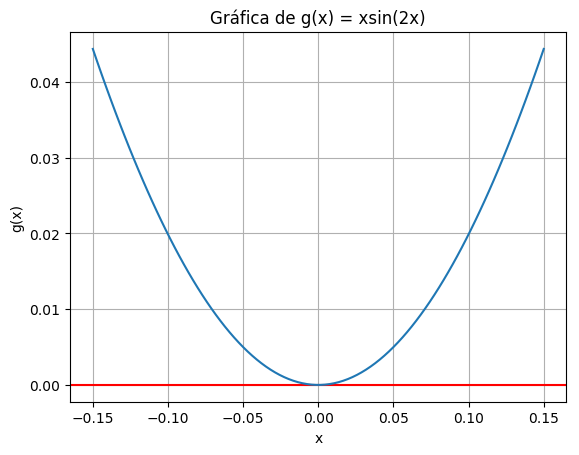

In [17]:
x = linspace(-0.15, 0.15, 100)
y = g.(x)

title("Gráfica de g(x) = xsin(2x)")#Título de la gráfica
xlabel("x") #Etiqueta para el eje X
ylabel("g(x)")#Etiqueta para el eje Y

axhline(0, color="red") 
grid()

plot(x,y)
show()

In [18]:
newton1D(g,0.7)

5.946284956146048e-17

---

## Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea, aunque sí se les dará retroalimentación respecto a lo que escriben. La idea es empezar a pensar en esto.

La estructura de los duales utilizados es:

    $Dual(g(x), g'(f(x))*f'(x))$  ....(1)
   
Por tanto, una segunda derivada sería de la forma:

    $Dual( g'(f(x))*f'(x), h'(g'(f(x)))*f''(x))$  ....(2)

Aplicando esta idea al cálculo de la segunda derivada de $sin(x)$:

Consideramos $x = a.fun$

De (1) tenemos: 
     
      $ Dual(sin(a.fun), cos(a.fun) * a.der ) $ ....(3)

De (2) tenemos: 

      $ Dual(cos(a.fun) * a.der, - sin(a.fun) * a.der * a.der ) $  ....(4)


De (4) podemos notar las siguientes partes:

$Dual( \underbrace{cos(a.fun)}_{T_1} \underbrace{* a.der}_{i}, \underbrace{- sin(a.fun)}_{T_2}  \underbrace{* a.der * a.der}_{j} ) $


Intuitivamente vemos que j indica el grado de la derivada que estamos calculando, de tal modo que, si queremos la tercera derivada, tendremos j = 3 y el término por el cual multiplicaremos a T2 será  $(* a.der * a.der * a.der)$ . Análogamente para las derivadas de orden superior. 

La relación entre $i$ y $j$ es: $i = j-1$


Cabe mencionar que T1 y T2 corresponden a f(x) y f'(x) respectivamente, por lo que el tratamiento para obtener T2 a parti de T1 ya se encuentra, de cierto modo, en AutomDiff.jl

Por lo anterior, el cálculo de derivadas de orden superior, implica considerar el valor de $j$ como el número de veces que multiplicaremos $*a.der$ por T2, así como su relación con $i$.